DataPreprocessing

Importing necessary libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings

Import the dataset

In [141]:
rain_df= pd.read_csv('/content/rainfall _in _india _1901-2015.csv')
rain_df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


Analyse the data and handling the missing values

In [22]:
rain_df=rain_df[["SUBDIVISION","YEAR","JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]]
rain_df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7


In [23]:
rain_df.count()

SUBDIVISION    4116
YEAR           4116
JAN            4112
FEB            4113
MAR            4110
APR            4112
MAY            4113
JUN            4111
JUL            4109
AUG            4112
SEP            4110
OCT            4109
NOV            4105
DEC            4106
dtype: int64

In [24]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 450.3+ KB


In [25]:
rain_df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
dtype: int64

In [26]:
rain_df=rain_df.fillna(rain_df.mean())

In [27]:
rain_df.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
dtype: int64

In [28]:
rain_df.rename(columns={"JAN":1,"FEB":2,"MAR":3,"APR":4,"MAY":5,"JUN":6,"JUL":7,"AUG":8,"SEP":9,"OCT":10,"NOV":11,"DEC":12}, inplace = True)

In [29]:
rain_df.head()

,SUBDIVISION,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7


In [30]:
df1=pd.read_csv('/content/District_Rainfall.csv')

In [31]:
df1.isnull().any()

STATE/UT    False
DISTRICT    False
JAN         False
FEB         False
MAR         False
APR         False
MAY         False
JUN         False
JUL         False
AUG         False
SEP         False
OCT         False
NOV         False
DEC         False
ANNUAL      False
JAN+FEB     False
MAM         False
JJAS        False
OND         False
dtype: bool

In [32]:
df1.isnull().any()

STATE/UT    False
DISTRICT    False
JAN         False
FEB         False
MAR         False
APR         False
MAY         False
JUN         False
JUL         False
AUG         False
SEP         False
OCT         False
NOV         False
DEC         False
ANNUAL      False
JAN+FEB     False
MAM         False
JJAS        False
OND         False
dtype: bool

In [33]:
df1.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN+FEB,MAM,JJAS,OND
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,641.000000
mean,18.355070,20.984399,30.034789,45.543214,81.535101,196.007332,326.033697,291.152262,194.609048,90.446334,34.117473,18.150858,1346.969579,39.339470,157.113105,1007.80234,142.714665
std,21.082806,27.729596,45.451082,71.556279,111.960390,196.556284,221.364643,152.647325,99.830540,74.990685,59.371274,32.711009,838.878874,47.212773,213.445888,629.33261,148.951752
min,0.000000,0.000000,0.000000,0.000000,0.900000,3.800000,11.600000,14.100000,8.600000,3.100000,1.200000,0.000000,94.600000,0.000000,1.500000,39.60000,5.600000
25%,6.900000,7.000000,7.000000,5.000000,12.100000,68.800000,206.400000,194.600000,128.800000,34.300000,6.600000,5.300000,830.400000,14.700000,27.800000,625.40000,51.600000
50%,13.300000,12.300000,12.700000,15.100000,33.900000,131.900000,293.700000,284.800000,181.300000,62.600000,12.900000,7.900000,1116.200000,27.700000,67.200000,896.60000,86.700000
75%,19.200000,24.100000,33.200000,48.300000,91.900000,226.600000,374.800000,358.100000,234.100000,130.200000,32.300000,14.900000,1530.900000,41.100000,172.400000,1193.80000,175.200000
max,144.500000,229.600000,367.900000,554.400000,733.700000,1476.200000,1820.900000,1522.100000,826.300000,517.700000,475.100000,297.700000,7229.300000,335.300000,1256.500000,5228.00000,1048.500000


In [34]:
df1.head()

,STATE/UT,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN+FEB,MAM,JJAS,OND
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [35]:
df1.DISTRICT.value_counts()

BIJAPUR        2
BILASPUR       2
AURANGABAD     2
HAMIRPUR       2
NICOBAR        1
              ..
GONDA          1
GORAKHPUR      1
HARDOI         1
JAUNPUR        1
LAKSHADWEEP    1
Name: DISTRICT, Length: 637, dtype: int64

In [36]:
df1.isnull().any()

STATE/UT    False
DISTRICT    False
JAN         False
FEB         False
MAR         False
APR         False
MAY         False
JUN         False
JUL         False
AUG         False
SEP         False
OCT         False
NOV         False
DEC         False
ANNUAL      False
JAN+FEB     False
MAM         False
JJAS        False
OND         False
dtype: bool

Data visualisation ,dependent & independent,train & test

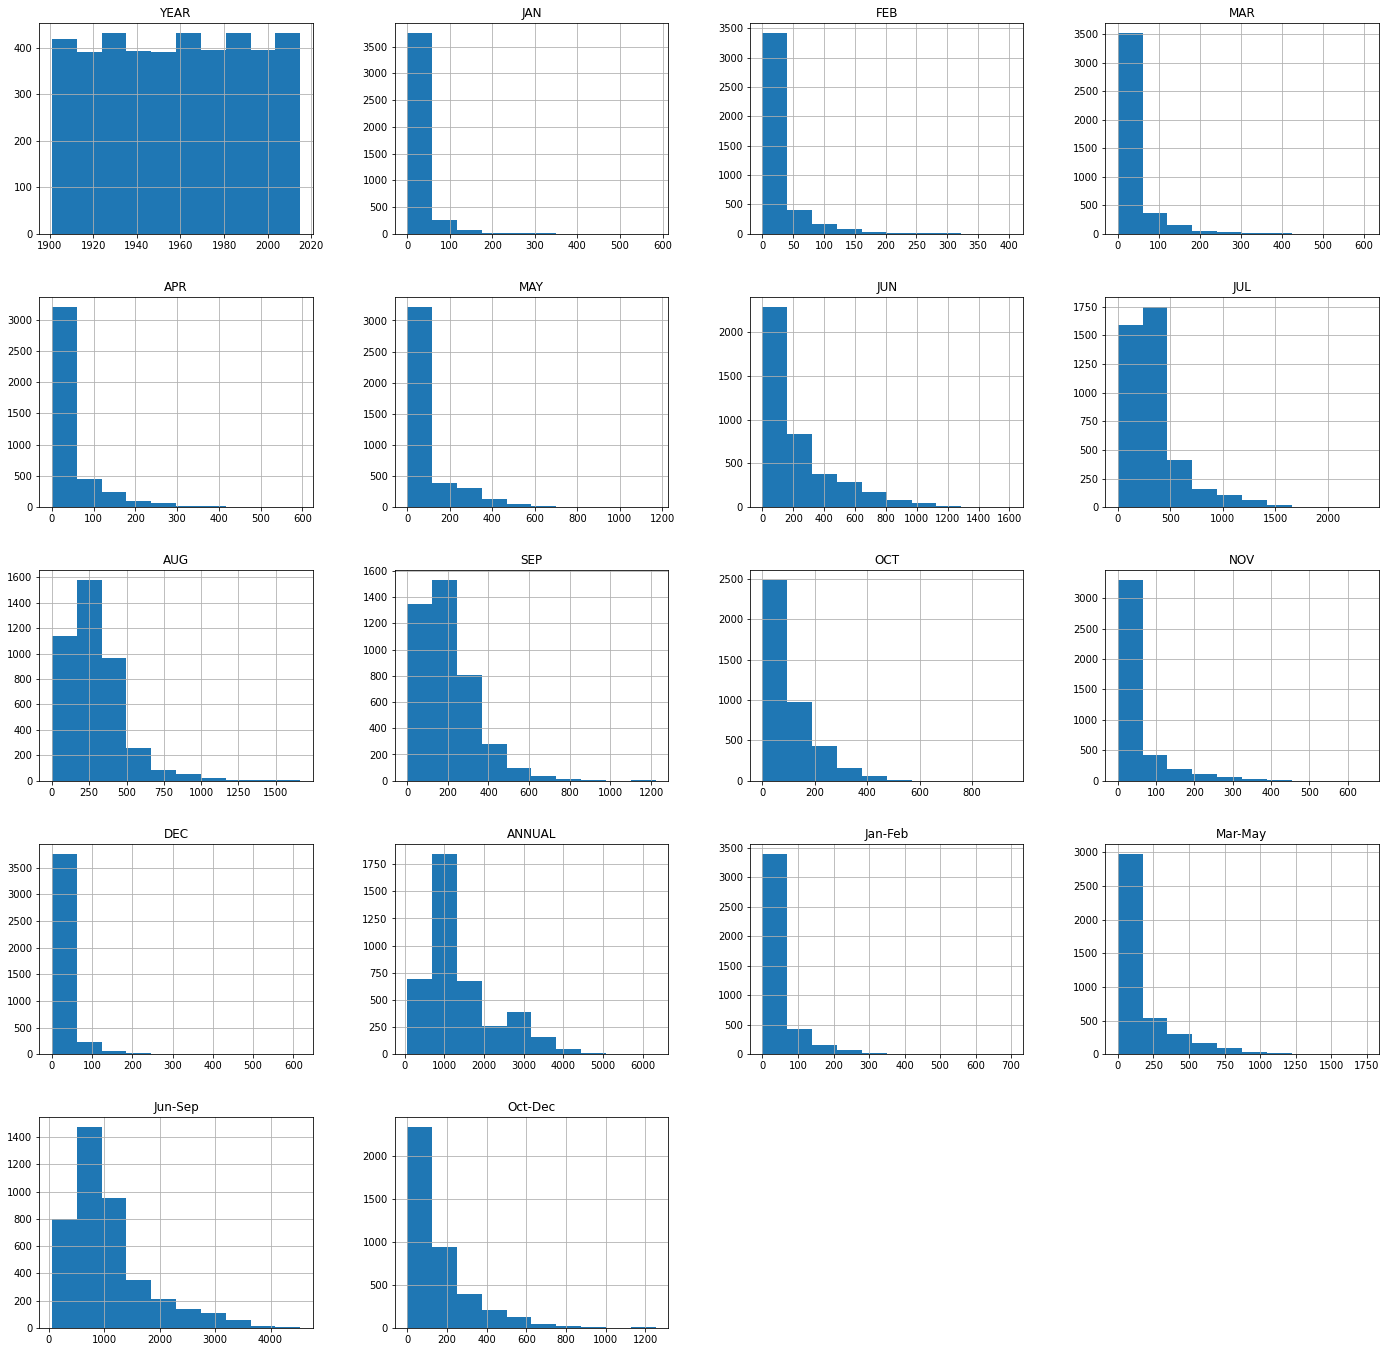

In [142]:
rain_df.hist(figsize=(24,24));

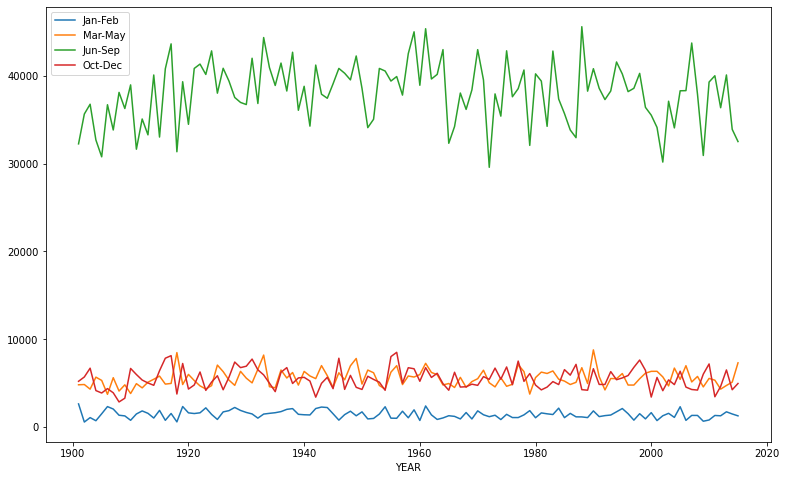

In [143]:
rain_df[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(13,8));

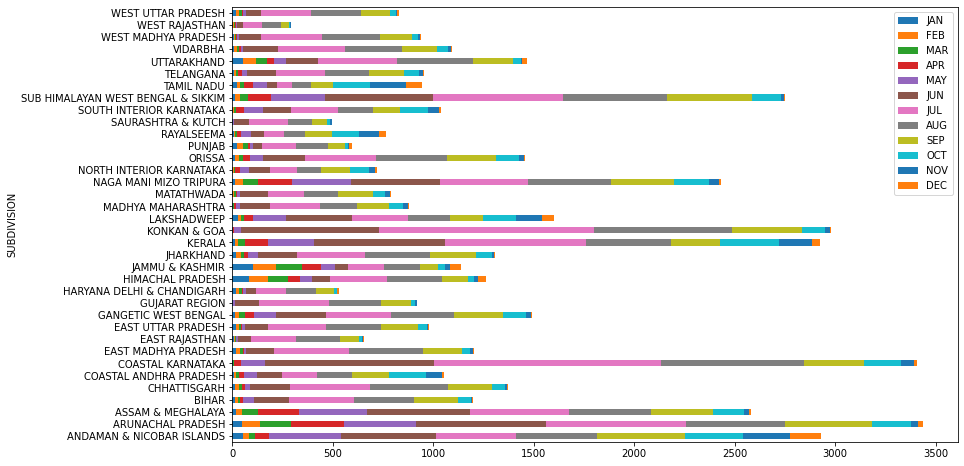

In [144]:
rain_df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));

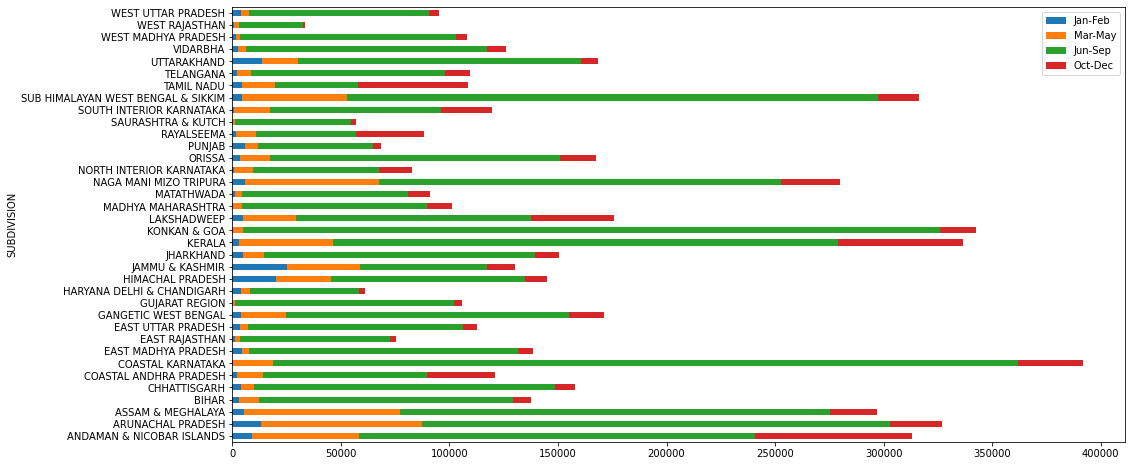

In [146]:
rain_df[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

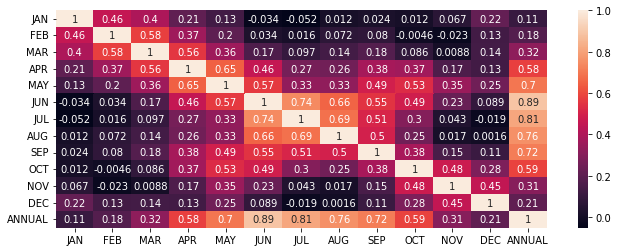

In [148]:
plt.figure(figsize=(11,4))
sns.heatmap(rain_df[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [39]:
mintemp_df=pd.read_csv('/content/temp1.csv')
mintemp_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,9.65,11.38,16.27,20.56,23.29,25.00,23.68,22.61,22.00,19.52,14.28,10.93
1,1902,11.17,12.61,17.71,21.02,23.80,24.62,23.50,23.47,21.59,18.73,13.62,10.38
2,1903,10.34,11.57,15.54,20.21,22.93,24.90,23.84,22.73,21.83,18.53,13.20,10.00
3,1904,10.11,12.07,15.90,21.22,23.08,23.75,22.70,22.69,21.60,18.75,13.54,10.71
4,1905,9.24,10.28,14.63,18.76,23.72,25.21,23.45,23.12,21.86,19.01,14.63,10.50


In [40]:
mintemp_df.count()

Year    121
Jan     121
Feb     121
Mar     121
Apr     121
May     121
Jun     121
Jul     121
Aug     121
Sep     121
Oct     121
Nov     121
Dec     121
dtype: int64

In [41]:
mintemp_df.isnull().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
dtype: int64

In [42]:
mintemp_df.rename(columns={"Year":"YEAR","Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}, inplace = True)
mintemp_df.head()

,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,1901,9.65,11.38,16.27,20.56,23.29,25.00,23.68,22.61,22.00,19.52,14.28,10.93
1,1902,11.17,12.61,17.71,21.02,23.80,24.62,23.50,23.47,21.59,18.73,13.62,10.38
2,1903,10.34,11.57,15.54,20.21,22.93,24.90,23.84,22.73,21.83,18.53,13.20,10.00
3,1904,10.11,12.07,15.90,21.22,23.08,23.75,22.70,22.69,21.60,18.75,13.54,10.71
4,1905,9.24,10.28,14.63,18.76,23.72,25.21,23.45,23.12,21.86,19.01,14.63,10.50


In [43]:
meantemp_df=pd.read_csv('/content/temp2.csv')
meantemp_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,16.62,18.51,23.71,27.68,29.92,30.23,27.62,26.28,26.43,25.37,20.90,17.83
1,1902,18.16,19.81,25.06,28.08,30.38,29.87,27.42,27.17,26.02,24.61,20.35,17.31
2,1903,17.32,18.72,22.87,27.31,29.55,30.16,27.79,26.40,26.26,24.38,19.81,16.92
3,1904,17.13,19.27,23.27,28.26,29.68,28.98,26.65,26.37,26.08,24.66,20.20,17.62
4,1905,16.22,17.46,21.95,25.88,30.33,30.50,27.39,26.77,26.29,24.84,21.32,17.38


In [44]:
meantemp_df.count()

Year    121
Jan     121
Feb     121
Mar     121
Apr     121
May     121
Jun     121
Jul     121
Aug     121
Sep     121
Oct     121
Nov     121
Dec     121
dtype: int64

In [63]:
meantemp_df.isnull().sum()

YEAR    0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
dtype: int64

In [64]:
meantemp_df.rename(columns={"Year":"YEAR","Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}, inplace = True)
meantemp_df.head()

,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,1901,16.62,18.51,23.71,27.68,29.92,30.23,27.62,26.28,26.43,25.37,20.90,17.83
1,1902,18.16,19.81,25.06,28.08,30.38,29.87,27.42,27.17,26.02,24.61,20.35,17.31
2,1903,17.32,18.72,22.87,27.31,29.55,30.16,27.79,26.40,26.26,24.38,19.81,16.92
3,1904,17.13,19.27,23.27,28.26,29.68,28.98,26.65,26.37,26.08,24.66,20.20,17.62
4,1905,16.22,17.46,21.95,25.88,30.33,30.50,27.39,26.77,26.29,24.84,21.32,17.38


In [65]:
preceptions_df=pd.read_csv('/content/temp2.csv')
preceptions_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,16.62,18.51,23.71,27.68,29.92,30.23,27.62,26.28,26.43,25.37,20.90,17.83
1,1902,18.16,19.81,25.06,28.08,30.38,29.87,27.42,27.17,26.02,24.61,20.35,17.31
2,1903,17.32,18.72,22.87,27.31,29.55,30.16,27.79,26.40,26.26,24.38,19.81,16.92
3,1904,17.13,19.27,23.27,28.26,29.68,28.98,26.65,26.37,26.08,24.66,20.20,17.62
4,1905,16.22,17.46,21.95,25.88,30.33,30.50,27.39,26.77,26.29,24.84,21.32,17.38


In [66]:
preceptions_df.count()

Year    121
Jan     121
Feb     121
Mar     121
Apr     121
May     121
Jun     121
Jul     121
Aug     121
Sep     121
Oct     121
Nov     121
Dec     121
dtype: int64

In [67]:
preceptions_df.isnull().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
dtype: int64

In [68]:
preceptions_df.rename(columns={"Year":"YEAR","Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}, inplace = True)
preceptions_df.head()

,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,1901,16.62,18.51,23.71,27.68,29.92,30.23,27.62,26.28,26.43,25.37,20.90,17.83
1,1902,18.16,19.81,25.06,28.08,30.38,29.87,27.42,27.17,26.02,24.61,20.35,17.31
2,1903,17.32,18.72,22.87,27.31,29.55,30.16,27.79,26.40,26.26,24.38,19.81,16.92
3,1904,17.13,19.27,23.27,28.26,29.68,28.98,26.65,26.37,26.08,24.66,20.20,17.62
4,1905,16.22,17.46,21.95,25.88,30.33,30.50,27.39,26.77,26.29,24.84,21.32,17.38


In [69]:
pressure_df=pd.read_csv('/content/pressure1.csv')
pressure_df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,1981,94.20,94.10,93.97,93.78,93.66,93.56,93.58,93.62,93.69,93.94,94.05,94.30,93.87
1,1982,94.18,94.01,93.90,93.79,93.79,93.63,93.59,93.66,93.84,94.02,94.08,94.27,93.90
2,1983,94.27,94.07,93.98,93.81,93.71,93.57,93.59,93.59,93.67,93.83,94.17,94.14,93.87
3,1984,93.98,93.90,93.94,93.70,93.56,93.48,93.51,93.66,93.77,93.92,94.11,94.00,93.79
4,1985,94.09,93.72,93.89,93.67,93.55,93.60,93.68,93.62,93.75,93.86,94.05,94.15,93.80


In [70]:
pressure_df.count()

YEAR    41
JAN     41
FEB     41
MAR     41
APR     41
MAY     41
JUN     41
JUL     41
AUG     41
SEP     41
OCT     41
NOV     41
DEC     41
ANN     41
dtype: int64

In [71]:
pressure_df.isnull().sum()

YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
ANN     0
dtype: int64

In [72]:
pressure_df=pressure_df.drop(['ANN'], axis=1)
pressure_df.rename(columns={"JAN":1,"FEB":2,"MAR":3,"APR":4,"MAY":5,"JUN":6,"JUL":7,"AUG":8,"SEP":9,"OCT":10,"NOV":11,"DEC":12}, inplace = True)
pressure_df.head()

,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,1981,94.20,94.10,93.97,93.78,93.66,93.56,93.58,93.62,93.69,93.94,94.05,94.30
1,1982,94.18,94.01,93.90,93.79,93.79,93.63,93.59,93.66,93.84,94.02,94.08,94.27
2,1983,94.27,94.07,93.98,93.81,93.71,93.57,93.59,93.59,93.67,93.83,94.17,94.14
3,1984,93.98,93.90,93.94,93.70,93.56,93.48,93.51,93.66,93.77,93.92,94.11,94.00
4,1985,94.09,93.72,93.89,93.67,93.55,93.60,93.68,93.62,93.75,93.86,94.05,94.15


In [73]:
windspeed_df=pd.read_csv('/content/wind.csv')
windspeed_df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,1981,7.29,7.15,7.05,9.35,8.31,9.61,8.81,10.47,8.70,8.83,7.58,7.23,12.99
1,1982,7.68,6.14,7.47,9.29,6.65,10.27,9.51,8.90,8.73,6.58,8.37,6.70,13.64
2,1983,7.41,6.71,9.25,10.79,9.80,15.41,9.66,9.92,8.40,9.20,8.77,9.21,15.48
3,1984,7.57,8.34,7.80,10.02,11.00,13.09,12.59,7.66,10.71,8.23,6.33,8.33,14.17
4,1985,8.12,6.91,8.68,9.02,9.73,9.15,8.80,8.38,8.44,9.83,7.91,7.60,12.52


In [74]:
windspeed_df.count()

YEAR    41
JAN     41
FEB     41
MAR     41
APR     41
MAY     41
JUN     41
JUL     41
AUG     41
SEP     41
OCT     41
NOV     41
DEC     41
ANN     41
dtype: int64

In [75]:
windspeed_df.isnull().sum()

YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
ANN     0
dtype: int64

In [76]:
windspeed_df=windspeed_df.drop(['ANN'], axis=1)
windspeed_df.rename(columns={"JAN":1,"FEB":2,"MAR":3,"APR":4,"MAY":5,"JUN":6,"JUL":7,"AUG":8,"SEP":9,"OCT":10,"NOV":11,"DEC":12}, inplace = True)
windspeed_df.head()

,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,1981,7.29,7.15,7.05,9.35,8.31,9.61,8.81,10.47,8.70,8.83,7.58,7.23
1,1982,7.68,6.14,7.47,9.29,6.65,10.27,9.51,8.90,8.73,6.58,8.37,6.70
2,1983,7.41,6.71,9.25,10.79,9.80,15.41,9.66,9.92,8.40,9.20,8.77,9.21
3,1984,7.57,8.34,7.80,10.02,11.00,13.09,12.59,7.66,10.71,8.23,6.33,8.33
4,1985,8.12,6.91,8.68,9.02,9.73,9.15,8.80,8.38,8.44,9.83,7.91,7.60


In [77]:
sub=rain_df["SUBDIVISION"].unique()

In [78]:
year=pd.Series(np.arange(1981,2016))
year

0     1981
1     1982
2     1983
3     1984
4     1985
5     1986
6     1987
7     1988
8     1989
9     1990
10    1991
11    1992
12    1993
13    1994
14    1995
15    1996
16    1997
17    1998
18    1999
19    2000
20    2001
21    2002
22    2003
23    2004
24    2005
25    2006
26    2007
27    2008
28    2009
29    2010
30    2011
31    2012
32    2013
33    2014
34    2015
dtype: int64

In [79]:
a=pd.DataFrame({"SUBDIVISION":[],"YEAR":[],"MONTH":[],"MAX_TEMP":[],"MIN_TEMP":[],"MEAN_TEMP":[],"PRECEPTIONS":[],"PRESSURE":[],"WIND_SPEED":[],"RAINFALL":[],})
a

,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL


In [80]:
t=pd.DataFrame({"RAINFALL":[]})

In [81]:
for i in range(0,len(sub)):
    for j in range(0,len(year)):
        month=rain_df[rain_df["YEAR"]==year[j]]
        month=month[month["SUBDIVISION"]==sub[i]]
        t["RAINFALL"]=month[[1,2,3,4,5,6,7,8,9,10,11,12]].T
        #t=t.rename(columns={j:"RAINFALL"})
        month=month[["SUBDIVISION","YEAR"]]
#        month=maxtemp_df[maxtemp_df["YEAR"]==year[j]]
 #       t["MAX_TEMP"]=month[[1,2,3,4,5,6,7,8,9,10,11,12]].T
        month=mintemp_df[mintemp_df["YEAR"]==year[j]]
        t["MIN_TEMP"]=month[[1,2,3,4,5,6,7,8,9,10,11,12]].T
        month=meantemp_df[meantemp_df["YEAR"]==year[j]]
        t["MEAN_TEMP"]=month[[1,2,3,4,5,6,7,8,9,10,11,12]].T
        month=preceptions_df[preceptions_df["YEAR"]==year[j]]
        t["PRECEPTIONS"]=month[[1,2,3,4,5,6,7,8,9,10,11,12]].T
        month=pressure_df[pressure_df["YEAR"]==year[j]]
        #t["PRESSURE"]=month[[1,2,3,4,5,6,7,8,9,10,11,12]].T
        month=windspeed_df[windspeed_df["YEAR"]==year[j]]
        t["WIND_SPEED"]=month[[1,2,3,4,5,6,7,8,9,10,11,12]].T
        t["SUBDIVISION"]=sub[i]
        t["YEAR"]=year[j]
        t["MONTH"]=[1,2,3,4,5,6,7,8,9,10,11,12]
        a=a.append(t)
a.head(20)

,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
1,ANDAMAN & NICOBAR ISLANDS,1981.0,1.0,NaN,10.68,17.21,17.21,NaN,7.29,11.1
2,ANDAMAN & NICOBAR ISLANDS,1981.0,2.0,NaN,12.99,20.21,20.21,NaN,7.15,27.8
3,ANDAMAN & NICOBAR ISLANDS,1981.0,3.0,NaN,16.50,23.59,23.59,NaN,7.05,1.7
4,ANDAMAN & NICOBAR ISLANDS,1981.0,4.0,NaN,21.06,28.04,28.04,NaN,9.35,94.1
5,ANDAMAN & NICOBAR ISLANDS,1981.0,5.0,NaN,23.54,30.04,30.04,NaN,8.31,270.8
6,ANDAMAN & NICOBAR ISLANDS,1981.0,6.0,NaN,24.72,29.92,29.92,NaN,9.61,600.6
7,ANDAMAN & NICOBAR ISLANDS,1981.0,7.0,NaN,23.33,27.01,27.01,NaN,8.81,344.1
8,ANDAMAN & NICOBAR ISLANDS,1981.0,8.0,NaN,22.88,26.54,26.54,NaN,10.47,510.7
9,ANDAMAN & NICOBAR ISLANDS,1981.0,9.0,NaN,22.13,26.63,26.63,NaN,8.70,452.6
10,ANDAMAN & NICOBAR ISLANDS,1981.0,10.0,NaN,19.07,24.98,24.98,NaN,8.83,242.1


In [82]:
a.count()

SUBDIVISION    15120
YEAR           15120
MONTH          15120
MAX_TEMP           0
MIN_TEMP       15120
MEAN_TEMP      15120
PRECEPTIONS    15120
PRESSURE           0
WIND_SPEED     15120
RAINFALL       15120
dtype: int64

In [83]:
a.dropna()

,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL


In [84]:
a.dtypes

SUBDIVISION     object
YEAR           float64
MONTH          float64
MAX_TEMP       float64
MIN_TEMP       float64
MEAN_TEMP      float64
PRECEPTIONS    float64
PRESSURE       float64
WIND_SPEED     float64
RAINFALL       float64
dtype: object

In [85]:
a=a.astype({"MONTH": np.int64,"YEAR":np.int64})

In [86]:
a.tail()

,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
8,LAKSHADWEEP,2015,8,NaN,23.50,27.12,27.12,NaN,10.68,146.4
9,LAKSHADWEEP,2015,9,NaN,22.71,27.19,27.19,NaN,10.12,160.4
10,LAKSHADWEEP,2015,10,NaN,20.19,26.05,26.05,NaN,7.45,165.4
11,LAKSHADWEEP,2015,11,NaN,15.87,22.52,22.52,NaN,7.91,231.0
12,LAKSHADWEEP,2015,12,NaN,12.21,18.96,18.96,NaN,8.04,159.0


In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [90]:
rain_df=pd.read_csv('/content/dataset_rainfall.csv')
rain_df.head()

,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
0,ANDAMAN & NICOBAR ISLANDS,1981,1,10.68,23.80,17.21,20.71,94.20,7.29,11.1
1,ANDAMAN & NICOBAR ISLANDS,1981,2,12.99,27.48,20.21,8.59,94.10,7.15,27.8
2,ANDAMAN & NICOBAR ISLANDS,1981,3,16.50,30.73,23.59,34.10,93.97,7.05,1.7
3,ANDAMAN & NICOBAR ISLANDS,1981,4,21.06,35.07,28.04,35.36,93.78,9.35,94.1
4,ANDAMAN & NICOBAR ISLANDS,1981,5,23.54,36.59,30.04,64.94,93.66,8.31,270.8


In [91]:
rain_df.tail()

,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
15115,LAKSHADWEEP,2015,8,23.50,30.79,27.12,252.07,93.80,10.68,146.4
15116,LAKSHADWEEP,2015,9,22.71,31.73,27.19,156.85,93.84,10.12,160.4
15117,LAKSHADWEEP,2015,10,20.19,31.95,26.05,48.28,94.07,7.45,165.4
15118,LAKSHADWEEP,2015,11,15.87,29.21,22.52,41.11,94.08,7.91,231.0
15119,LAKSHADWEEP,2015,12,12.21,25.75,18.96,11.60,94.27,8.04,159.0


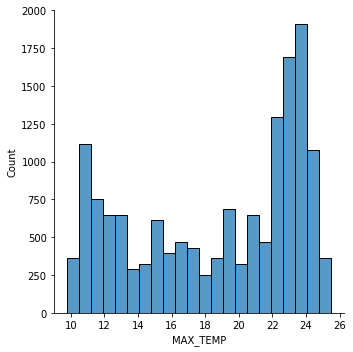

In [92]:
sns.displot(rain_df["MAX_TEMP"])

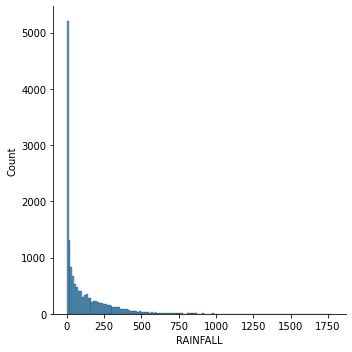

In [93]:
sns.displot(rain_df["RAINFALL"])

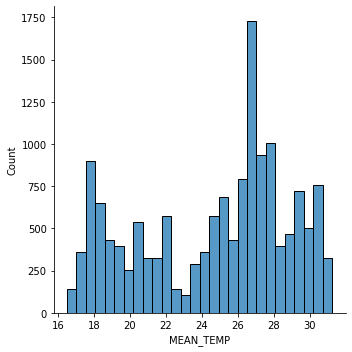

In [94]:
sns.displot(rain_df["MEAN_TEMP"])

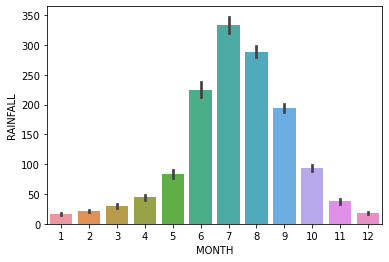

In [95]:
sns.barplot(x=rain_df.MONTH,y=rain_df.RAINFALL)

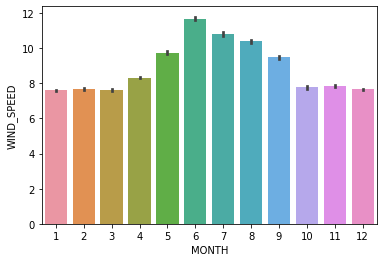

In [96]:
sns.barplot(x=rain_df.MONTH,y=rain_df.WIND_SPEED)

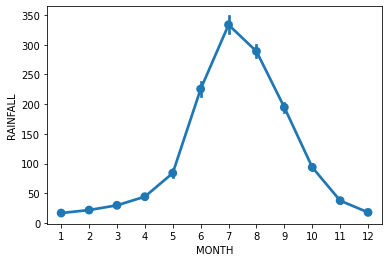

In [97]:
sns.pointplot(x=rain_df.MONTH,y=rain_df.RAINFALL)

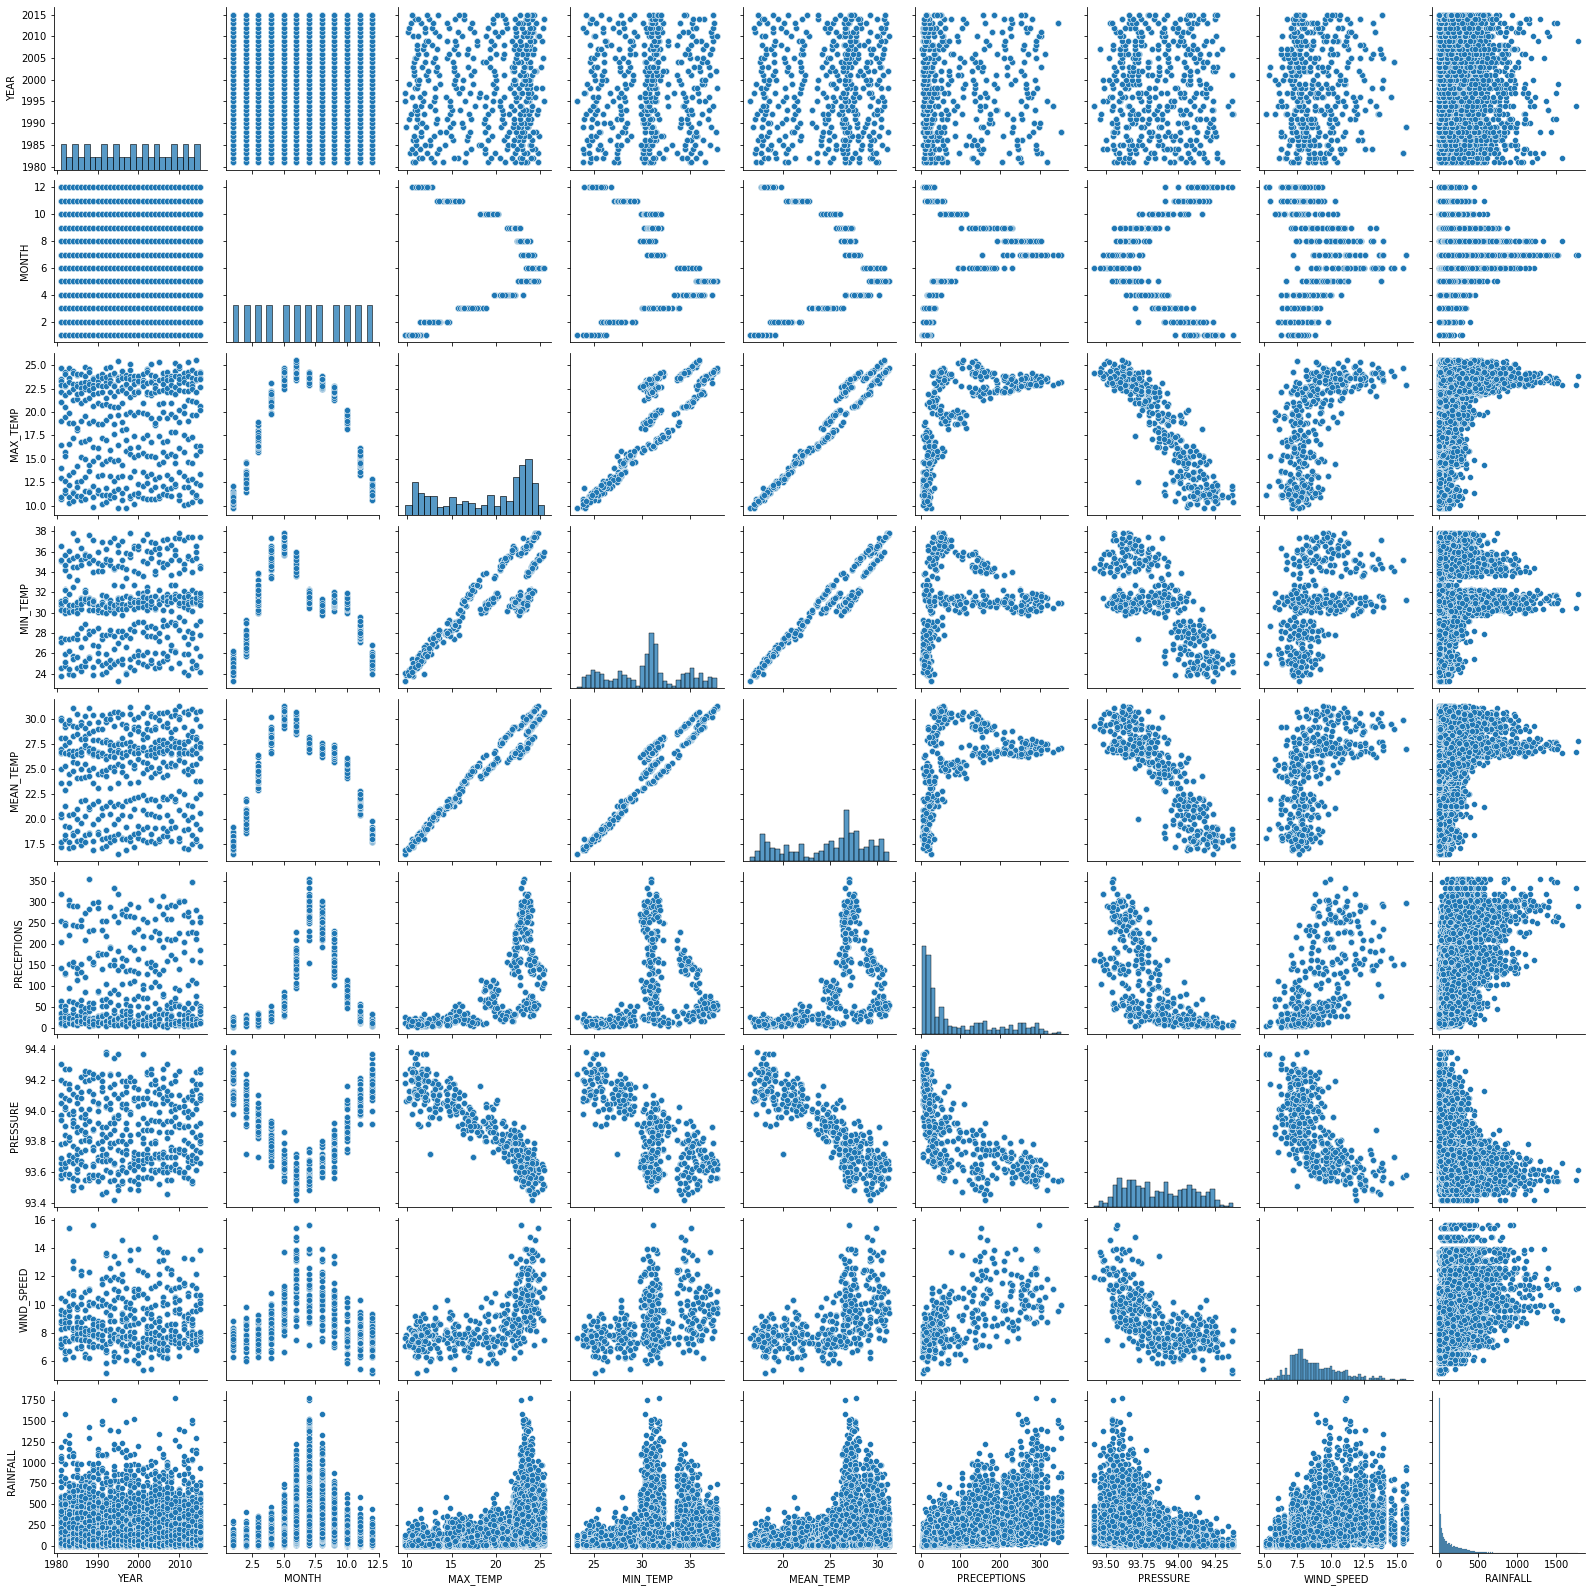

In [98]:
sns.pairplot(data=rain_df)

In [99]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  15120 non-null  object 
 1   YEAR         15120 non-null  int64  
 2   MONTH        15120 non-null  int64  
 3   MAX_TEMP     15120 non-null  float64
 4   MIN_TEMP     15120 non-null  float64
 5   MEAN_TEMP    15120 non-null  float64
 6   PRECEPTIONS  15120 non-null  float64
 7   PRESSURE     15120 non-null  float64
 8   WIND_SPEED   15120 non-null  float64
 9   RAINFALL     15120 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.2+ MB


In [100]:
rain_df.SUBDIVISION.unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [101]:
rain_df.describe()

,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,1998.000000,6.500000,18.733690,30.683149,24.684738,91.650214,93.864238,8.881357,115.578850
std,10.099839,3.452167,4.887405,3.708194,4.144350,96.136927,0.228435,1.884528,169.980029
min,1981.000000,1.000000,9.760000,23.270000,16.490000,2.440000,93.420000,5.210000,0.000000
25%,1989.000000,3.750000,13.920000,27.802500,20.947500,16.252500,93.670000,7.547500,5.100000
50%,1998.000000,6.500000,20.105000,30.940000,26.100000,42.450000,93.845000,8.395000,42.100000
75%,2007.000000,9.250000,23.180000,33.635000,27.685000,154.960000,94.070000,9.980000,164.400000
max,2015.000000,12.000000,25.500000,37.810000,31.250000,354.920000,94.380000,15.620000,1778.900000


In [102]:
rain_df.corr()

,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
YEAR,1.000000e+00,-3.569805e-16,0.040999,0.057941,0.050065,0.007486,0.029321,0.025835,-0.012344
MONTH,-3.569805e-16,1.000000e+00,0.111166,-0.099449,0.021053,0.245308,0.010055,0.064159,0.147486
MAX_TEMP,4.099868e-02,1.111663e-01,1.000000,0.857817,0.973184,0.686152,-0.918220,0.615318,0.479007
MIN_TEMP,5.794095e-02,-9.944931e-02,0.857817,1.000000,0.953037,0.244385,-0.759595,0.405962,0.202100
MEAN_TEMP,5.006517e-02,2.105255e-02,0.973184,0.953037,1.000000,0.513682,-0.881010,0.544254,0.372699
PRECEPTIONS,7.486192e-03,2.453079e-01,0.686152,0.244385,0.513682,1.000000,-0.710945,0.628133,0.650912
PRESSURE,2.932063e-02,1.005470e-02,-0.918220,-0.759595,-0.881010,-0.710945,1.000000,-0.661762,-0.503677
WIND_SPEED,2.583470e-02,6.415856e-02,0.615318,0.405962,0.544254,0.628133,-0.661762,1.000000,0.446566
RAINFALL,-1.234368e-02,1.474856e-01,0.479007,0.202100,0.372699,0.650912,-0.503677,0.446566,1.000000


In [103]:
rain_df.isnull().sum()

SUBDIVISION    0
YEAR           0
MONTH          0
MAX_TEMP       0
MIN_TEMP       0
MEAN_TEMP      0
PRECEPTIONS    0
PRESSURE       0
WIND_SPEED     0
RAINFALL       0
dtype: int64

In [104]:
s=rain_df.corr()
s

,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
YEAR,1.000000e+00,-3.569805e-16,0.040999,0.057941,0.050065,0.007486,0.029321,0.025835,-0.012344
MONTH,-3.569805e-16,1.000000e+00,0.111166,-0.099449,0.021053,0.245308,0.010055,0.064159,0.147486
MAX_TEMP,4.099868e-02,1.111663e-01,1.000000,0.857817,0.973184,0.686152,-0.918220,0.615318,0.479007
MIN_TEMP,5.794095e-02,-9.944931e-02,0.857817,1.000000,0.953037,0.244385,-0.759595,0.405962,0.202100
MEAN_TEMP,5.006517e-02,2.105255e-02,0.973184,0.953037,1.000000,0.513682,-0.881010,0.544254,0.372699
PRECEPTIONS,7.486192e-03,2.453079e-01,0.686152,0.244385,0.513682,1.000000,-0.710945,0.628133,0.650912
PRESSURE,2.932063e-02,1.005470e-02,-0.918220,-0.759595,-0.881010,-0.710945,1.000000,-0.661762,-0.503677
WIND_SPEED,2.583470e-02,6.415856e-02,0.615318,0.405962,0.544254,0.628133,-0.661762,1.000000,0.446566
RAINFALL,-1.234368e-02,1.474856e-01,0.479007,0.202100,0.372699,0.650912,-0.503677,0.446566,1.000000


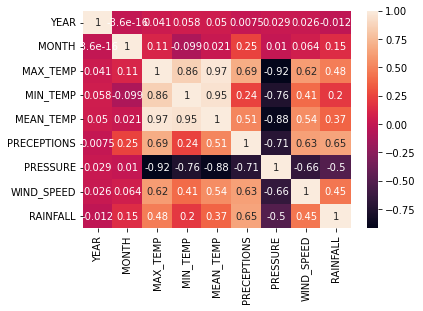

In [105]:
sns.heatmap(s,annot=True)

In [106]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  15120 non-null  object 
 1   YEAR         15120 non-null  int64  
 2   MONTH        15120 non-null  int64  
 3   MAX_TEMP     15120 non-null  float64
 4   MIN_TEMP     15120 non-null  float64
 5   MEAN_TEMP    15120 non-null  float64
 6   PRECEPTIONS  15120 non-null  float64
 7   PRESSURE     15120 non-null  float64
 8   WIND_SPEED   15120 non-null  float64
 9   RAINFALL     15120 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.2+ MB


In [107]:
rain_df.head()

,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
0,ANDAMAN & NICOBAR ISLANDS,1981,1,10.68,23.80,17.21,20.71,94.20,7.29,11.1
1,ANDAMAN & NICOBAR ISLANDS,1981,2,12.99,27.48,20.21,8.59,94.10,7.15,27.8
2,ANDAMAN & NICOBAR ISLANDS,1981,3,16.50,30.73,23.59,34.10,93.97,7.05,1.7
3,ANDAMAN & NICOBAR ISLANDS,1981,4,21.06,35.07,28.04,35.36,93.78,9.35,94.1
4,ANDAMAN & NICOBAR ISLANDS,1981,5,23.54,36.59,30.04,64.94,93.66,8.31,270.8


In [108]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
rain_df.SUBDIVISION = lab.fit_transform(rain_df.SUBDIVISION)

rain_df.head()

,SUBDIVISION,YEAR,MONTH,MAX_TEMP,MIN_TEMP,MEAN_TEMP,PRECEPTIONS,PRESSURE,WIND_SPEED,RAINFALL
0,0,1981,1,10.68,23.80,17.21,20.71,94.20,7.29,11.1
1,0,1981,2,12.99,27.48,20.21,8.59,94.10,7.15,27.8
2,0,1981,3,16.50,30.73,23.59,34.10,93.97,7.05,1.7
3,0,1981,4,21.06,35.07,28.04,35.36,93.78,9.35,94.1
4,0,1981,5,23.54,36.59,30.04,64.94,93.66,8.31,270.8


In [109]:
rain_df.SUBDIVISION.unique()

array([ 0,  1,  2, 21, 28, 10, 23, 15,  3,  9, 35, 31, 12, 24, 13, 14, 34,
        8, 33,  7, 11, 26, 17, 19, 20, 32,  4,  5, 30, 25, 29,  6, 22, 27,
       16, 18])

In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=2)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test